
#**BUILDING A NEW EMPLOYEE SECURITY SYSTEM**

Name- Aryan Ahuja


Problem Statement- You, as the Security analyst, at Stark Industries, have been tasked to build a new contactless employee check-in system. Currently the employees use a physical keycard for entry into the building like shown below. 

You have come up with a new idea that uses the employees smartphone and machine learning to provide a contactless system where when an employee enters the firm’s territory, his or her smartphone connects to the server and transmits data from the employee smartphone sensor data like the accelerometer's data. The server performs the calculations and determines this person as
one of the employees using Gait analysis. Essentially it compares the current pattern of the employee’s gait with the historial pattern and if there is a match, the doors automatically open for the employee to walk in. 

To test your idea, you have built a dataset of 30 employees and their daily activities here. Design and develop a system that will perform the gait analysis. 


###**GAIT ANALYSIS**
Gait analysis is an assessment of the way the body moves, usually by walking or running, from one place to another. The purpose of gait analysis is to detect any abnormalities in locomotion.


<p align="left">
  <img width="600" height="325" src="https://upload.wikimedia.org/wikipedia/commons/9/97/Two_repetitions_of_a_walking_sequence_of_an_individual_recorded_using_a_motion-capture_system.gif">
</p>

##**MAIN IDEOLOGY AND WORKFLOW**
In order to make predictions on and sense human activity, we aim at analazying the HAR Dataset and hence performing gait recognition using several ML Models to make predictions. 

Models like LSTM, Random Forest, Decision Tree and KNN are trained and then can be compared on the basis of their accuracies, F1 Score (complete classification report) and a final confusion matrix can be depicted for each of these models.

The models with the highest accuracies are saved as pickle objects and hence they can be deployed and implemented as a full fledged Security System.

##**ACTIVITIES BEING DETECTED**
1. WALKING 
2. WALKING_UPSTAIRS 
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING
6. LAYING

##**LSTM MODEL**

In [ ]:
!unzip "/content/UCI HAR Dataset.zip"

Archive:  /content/UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

list_sensors_data=['body_acc_x_train','body_acc_y_train','body_acc_z_train','body_gyro_x_train','body_gyro_y_train',
                   'body_gyro_z_train','total_acc_x_train','total_acc_y_train','total_acc_z_train']

In [ ]:


train_data=[]

In [ ]:
for fn in list_sensors_data:
  train_data.append(np.array(pd.read_csv("UCI HAR Dataset/train/Inertial Signals/"+fn+".txt",delim_whitespace=True,header=None)))

In [ ]:
np.array(train_data).shape

(9, 7352, 128)

In [ ]:
np.transpose(train_data,(1,2,0)).shape

(7352, 128, 9)

In [ ]:
train_data=np.transpose(train_data,(1,2,0))

In [ ]:
train_labels=pd.read_csv("UCI HAR Dataset/train/y_train.txt",header=None)

In [ ]:
train_labels=train_labels-1

In [ ]:
train_labels=np.array(train_labels)

In [ ]:
list_sensors_data=['body_acc_x_test','body_acc_y_test','body_acc_z_test','body_gyro_x_test','body_gyro_y_test',
                   'body_gyro_z_test','total_acc_x_test','total_acc_y_test','total_acc_z_test']

In [ ]:
test_data=[]


In [ ]:
for fn in list_sensors_data:
  test_data.append(np.array(pd.read_csv("UCI HAR Dataset/test/Inertial Signals/"+fn+".txt",delim_whitespace=True,header=None)))

In [ ]:
np.array(test_data).shape
     

(9, 2947, 128)

In [ ]:
np.transpose(test_data,(1,2,0)).shape

(2947, 128, 9)

In [ ]:
test_data=np.transpose(test_data,(1,2,0))
     

In [ ]:
test_labels=pd.read_csv("UCI HAR Dataset/test/y_test.txt",header=None)

In [ ]:
test_labels=test_labels-1

In [ ]:
test_labels=np.array(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
train_labels_cat=to_categorical(train_labels)

In [ ]:
test_labels_cat=to_categorical(test_labels)

In [ ]:
train_labels_cat.shape

(7352, 6)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [ ]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(128,9)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128, 128)          70656     
                                                                 
 dropout (Dropout)           (None, 128, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 120,454
Trainable params: 120,454
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_data,train_labels_cat,epochs=100,validation_split=0.05)

Epoch 1/100
219/219 [==============================] - 46s 193ms/step - loss: 0.8810 - accuracy: 0.6269 - val_loss: 0.6217 - val_accuracy: 0.7935
Epoch 2/100
219/219 [==============================] - 42s 190ms/step - loss: 0.4101 - accuracy: 0.8551 - val_loss: 0.2848 - val_accuracy: 0.8913
Epoch 3/100
219/219 [==============================] - 41s 186ms/step - loss: 0.2210 - accuracy: 0.9233 - val_loss: 0.1612 - val_accuracy: 0.9484
Epoch 4/100
219/219 [==============================] - 41s 186ms/step - loss: 0.1774 - accuracy: 0.9347 - val_loss: 0.1678 - val_accuracy: 0.9266
Epoch 5/100
219/219 [==============================] - 41s 188ms/step - loss: 0.1579 - accuracy: 0.9426 - val_loss: 0.1587 - val_accuracy: 0.9130
Epoch 6/100
219/219 [==============================] - 42s 192ms/step - loss: 0.1478 - accuracy: 0.9469 - val_loss: 0.1983 - val_accuracy: 0.9103
Epoch 7/100
219/219 [==============================] - 43s 197ms/step - loss: 0.1443 - accuracy: 0.9473 - val_loss: 0.1323 -

In [ ]:
pred_label_cat=model.predict(test_data)

93/93 [==============================] - 7s 65ms/step


In [ ]:
pred_label=np.argmax(pred_label_cat,axis=1)

In [ ]:
pred_label

array([4, 4, 4, ..., 1, 1, 1])

In [ ]:
import sklearn.metrics as m

In [ ]:
m.accuracy_score(test_labels,pred_label)

0.9144893111638955

In [ ]:
print(m.classification_report(test_labels,pred_label))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       496
           1       0.96      0.94      0.95       471
           2       0.88      0.97      0.92       420
           3       0.90      0.76      0.82       491
           4       0.80      0.93      0.86       532
           5       0.99      0.98      0.98       537

    accuracy                           0.91      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.91      0.91      2947



In [ ]:
print(m.confusion_matrix(test_labels,pred_label))

[[454   6  35   1   0   0]
 [  2 443  23   3   0   0]
 [  2  10 408   0   0   0]
 [  0   2   0 372 113   4]
 [  0   0   0  38 494   0]
 [  0   0   0   0  13 524]]


In [ ]:
model.save('Lstm.h5')

In [ ]:
train_df = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace = True,names=list(range(0,561)))

train_df['Subject'] = pd.read_csv("UCI HAR Dataset/train/subject_train.txt", header = None, squeeze = True)

train_df["activity"] = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)

In [ ]:
features = list()
with open("UCI HAR Dataset/features.txt") as f:
    for line in f:
        features.append(line.split()[1])

In [ ]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [ ]:
test_df = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace = True,names=list(range(0,561)))

test_df['Subject'] = pd.read_csv("UCI HAR Dataset/test/subject_test.txt", header = None, squeeze = True)

test_df["activity"] = pd.read_csv("UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)

In [ ]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,Subject,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2


In [ ]:
train_df['activity'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: activity, dtype: int64

In [ ]:
train_df.to_csv('train.csv',index_label=False)

In [ ]:
test_df.to_csv('test.csv',index_label=False)

In [ ]:
train_df.shape

(7352, 563)

In [ ]:
test_df.shape

(2947, 563)

In [ ]:
X_train=train_df.iloc[:,:-1]
y_train=train_df.iloc[:,-1]

In [ ]:
X_test=test_df.iloc[:,:-1]
y_test=test_df.iloc[:,-1]

In [ ]:
print(X_train.shape)
print(y_train.shape)

(7352, 562)
(7352,)


###**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='gini',min_samples_split=2,n_estimators=100)
rfc.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

###**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dsc=DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=4)
dsc.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier(min_samples_split=4)

In [ ]:
y_pred_rfc=rfc.predict(X_test)
y_pred_rfc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([5, 5, 5, ..., 2, 2, 1])

In [ ]:
y_pred_dsc=dsc.predict(X_test)
y_pred_dsc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([5, 5, 5, ..., 2, 1, 2])

In [ ]:
#Random Forest 
rfc.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9185612487275195

In [ ]:
#Decision Tree
dsc.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8642687478791992

In [ ]:
#1)Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           1       0.88      0.97      0.92       496
           2       0.89      0.89      0.89       471
           3       0.96      0.84      0.90       420
           4       0.90      0.88      0.89       491
           5       0.89      0.91      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



In [ ]:
#2)Decision Tree
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dsc))

              precision    recall  f1-score   support

           1       0.84      0.92      0.88       496
           2       0.83      0.80      0.81       471
           3       0.88      0.82      0.84       420
           4       0.83      0.78      0.80       491
           5       0.81      0.85      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



In [ ]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


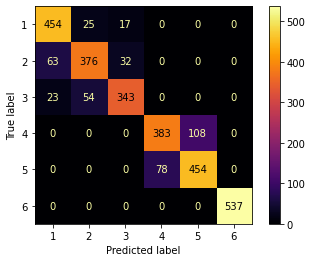

In [ ]:
#1) Random Forest
plot_confusion_matrix(dsc, X_test, y_test, cmap='inferno')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


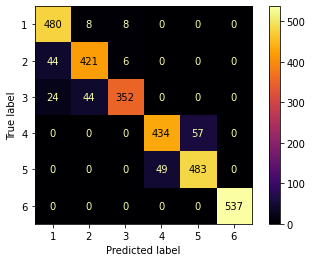

In [ ]:
#2) Decision Tree
plot_confusion_matrix(rfc, X_test, y_test, cmap='inferno')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9948930011348195

In [ ]:
roc_auc_score(y_test, dsc.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9176812828111262

##**KNN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,Subject,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5


In [ ]:
test_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,Subject,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5


In [ ]:
train_data.shape, test_data.shape

((7352, 563), (2947, 563))

In [ ]:
xtrain = train_data.iloc[:,0:562]
ytrain=train_data['activity']
xtest = test_data.iloc[:,0:562]
ytest =test_data['activity']

In [ ]:
xtrain.shape, xtest.shape

((7352, 562), (2947, 562))

In [ ]:
train_data['activity'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: activity, dtype: int64

In [ ]:
model = knn(n_jobs=-1)
#Hyper Parameters Set
metrics = ['euclidean','manhattan'] 
neighbors = np.arange(1, 16)
param_grid  = dict(metric=metrics, n_neighbors=neighbors)
tune_model = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', refit=True)

In [ ]:
tune_model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='accuracy')

In [ ]:
print("Best Hyper Parameters:\n",tune_model.best_params_)

Best Hyper Parameters:
 {'metric': 'manhattan', 'n_neighbors': 10}


In [ ]:
y_predict= tune_model.predict(xtest)

In [ ]:
accuracy_score(y_predict, ytest)

0.9107567017305734

In [ ]:
confusion_matrix(y_predict, ytest)

array([[484,  44,  51,   0,   0,   0],
       [  7, 424,  34,   1,   0,   0],
       [  5,   3, 335,   0,   0,   0],
       [  0,   0,   0, 408,  29,   2],
       [  0,   0,   0,  82, 503,   5],
       [  0,   0,   0,   0,   0, 530]])

In [ ]:
import pickle

In [ ]:
pickle.dump(tune_model,open("KNN_Model.pkl","wb+"),protocol=pickle.HIGHEST_PROTOCOL)

##**LINEAR SVM**

In [ ]:
import numpy as nm  
import matplotlib.pyplot as mtp 
import pandas as pd

In [ ]:
train_dataset=pd.read_csv('/content/train.csv')
test_dataset=pd.read_csv('/content/test.csv')

In [ ]:
x_train = train_dataset.iloc[:, 0 : 562].values  
y_train = train_dataset.iloc[:, 562].values 
x_test = test_dataset.iloc[:, 0 : 562].values  
y_test = test_dataset.iloc[:, 562].values 

In [ ]:
from sklearn.svm import SVC 
# "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  
     

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9633525619273838

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.98      0.95      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.89      0.92       491
           5       0.90      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
confusion_matrix(y_test, y_pred) 

array([[494,   1,   1,   0,   0,   0],
       [ 22, 447,   2,   0,   0,   0],
       [  4,   6, 410,   0,   0,   0],
       [  0,   1,   0, 435,  55,   0],
       [  0,   0,   0,  16, 516,   0],
       [  0,   0,   0,   0,   0, 537]])

In [ ]:
file = "SVM_Model.pkl"
fileObj = open(file , 'wb+')

In [ ]:
pickle.dump(classifier, fileObj, protocol=pickle.HIGHEST_PROTOCOL)

##**CONCLUSION**

| Model Name             	| Accuracy Acheived 	|
|------------------------	|-------------------	|
| Linear SVM             	| 96%               	|
| Decision Tree          	| 86.4%             	|
| Random Forest          	| 91.8%             	|
| KNN                    	| 91%               	|
| Stacked LSTM            | 91.4%               |

Hence, Linear SVM can be used to make predictions. 
The future work for the same includes collecting firbases and deploying the model as a full fledged android application that can be installed in the employees' mobile phone 